# Gathering data 

### importing libraries 

In [13]:
import pandas as pd 
import numpy as np 
import requests 
from PIL import Image 
from io import BytesIO
import tweepy 
import json 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
%config Inlinebackend.figure_format='retina'
sns.set_style("dark")

In [14]:
#from the given archive file 
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [16]:
# Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image-predictions.tsv',mode='wb') as file :
    file.write(response.content)
imgage_df=pd.read_csv('image-predictions.tsv',sep='\t')   
    

In [17]:
imgage_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
#Set up tweet API 
consumer_key = 'g2Gva2L3ULhXQt8VKRIb6NzDk'
consumer_secret = 'AOZrK4GcYGCHVA0PPvlDCzjpx89ke1Mu7XHIKEQ0togIHE4sAt'
access_token = '1177602022977212418-PNe9tVtccIJwL9qresQgyf5DeFKQlw'
access_secret = '81JC9vrFUwvD4OFqHIUHFMLyeVXfiVbf2mDBIiGB54jt0'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [19]:
ids=list(twitter_archive['tweet_id'])
tweet_data=[]
tweet_found=[]
tweet_notfound=[]
for element in ids:
    try:
        data= api.get_status(element,tweet_mode='extended',wait_on_rate_limit = True,wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_found.append(element)
    except:
        tweet_notfound.append(element)
        print(element)
    

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832
779123168116150273
775096608509886464
771004394259247104
770743923962707968
759566828574212096


Rate limit reached. Sleeping for: 289


754011816964026368
739932936087216128
680055455951884288


Rate limit reached. Sleeping for: 74


In [21]:
# Write tweet data to json file
with open('tweet_json.json', mode = 'w') as file:
    #_json property which contains JSON serializable response data. For example:
    json.dump([data._json for data in tweet_data], file)

In [22]:
print(os.getcwd())


/Users/islamabdelrahman/Desktop/python/we _rate_dogs


In [23]:
#loading the data into a frame 
import codecs
basePath = os.path.dirname(os.path.abspath('tweet_json.json'))
tweet_api=pd.read_json(open('tweet_json.json',mode='r',encoding='utf-8'))
tweet_api['tweet_id']=tweet_found


In [24]:

tweet_api = tweet_api[['tweet_id', 'favorite_count', 'retweet_count']]

tweet_api.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35321,7458
1,892177421306343426,30582,5536
2,891815181378084864,23010,3664
3,891689557279858688,38627,7629
4,891327558926688256,36897,8229


# Assessment 

#### 3 dataframes were gathered and they named as the following:
    - twitter_archive : has the tweet id, text, rating, dog name and breed 
    - tweet_api       : has the tweet id, favorute count and retweet count 
    _ imgage_df       : has the tweet_id, and the results of a neural network trying to identify dog breed in a tweet's picture

In [25]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [26]:
twitter_archive.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [27]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [67]:
sum(imgage_df.tweet_id.duplicated())

0

In [28]:
tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2330 non-null   int64
 1   favorite_count  2330 non-null   int64
 2   retweet_count   2330 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [62]:
2356-2075

281

In [29]:
imgage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# QULAITY

## completeness 
    tweet_api:
        - missing 27 tweets and their data 
    imgage_df:
        _ missing 281 records 

#### twitter_archive 
quality
- 1 tweet_id is in the 3 dataframes type int 
- 2 in twitter_archive timestamp is object instaed of datetime 
- 3 Ratings with decimal values
- 4 rating_numerator and rating_domincator can be combined in one column called rating
- 5 cleaning the dog names 
- 6 drop unneeded columns for analysis 

tideness 
- 7 columns (doggo, floofer, pupper and puppo) needs to be melted togther 
- 8 tideness :3 data frames needs not to be merged 

imgage_df: 
- 9 Make the capitalization of the p1, p2, and p3 column values uniform , replace _ in p1, p2 and p3 with space
- change p1,p2,p3 column names to meaningful names

# cleaning 

### define 
problem number 7 merge frames together 

### code 

In [30]:
#copying the df 
df1=twitter_archive.copy()
df2=tweet_api.copy()
df3=imgage_df.copy()

In [31]:
#merging 
df_master=df1.merge(df2,on='tweet_id')
df_master=df_master.merge(df3,on='tweet_id' )


### test

In [85]:
df_master.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


### define 
problem number 1 correct type error 

### code

In [32]:
df_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'favorite_count', 'retweet_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [33]:
df_master['tweet_id'] = df_master['tweet_id'].astype('object')
df_master['in_reply_to_status_id'] = df_master['in_reply_to_status_id'].astype('object')
df_master['in_reply_to_user_id'] = df_master['in_reply_to_user_id'].astype('object')
df_master['retweeted_status_id'] = df_master['retweeted_status_id'].astype('object')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2058 non-null   object 
 1   in_reply_to_status_id       23 non-null     object 
 2   in_reply_to_user_id         23 non-null     object 
 3   timestamp                   2058 non-null   object 
 4   source                      2058 non-null   object 
 5   text                        2058 non-null   object 
 6   retweeted_status_id         72 non-null     object 
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2058 non-null   object 
 10  rating_numerator            2058 non-null   int64  
 11  rating_denominator          2058 non-null   int64  
 12  name                        2058 non-null   object 
 13  doggo                       2058 

### Define 
problem 2 , correct timestamp type 


### code

In [34]:
df_master.timestamp=pd.to_datetime(df_master.timestamp)

In [35]:
#test 
df_master.timestamp.dtype

datetime64[ns, UTC]

### Define 
problem 3 Ratings with decimal values

In [112]:
#code 
df_master.rating_numerator.astype('float')

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
        ... 
2053     5.0
2054     6.0
2055     9.0
2056     7.0
2057     8.0
Name: rating_numerator, Length: 2058, dtype: float64

In [114]:
ratings = df_master.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)


In [116]:
df_master.rating_numerator = ratings


In [117]:
#test
df_master.rating_numerator

0       13
1       13
2       12
3       13
4       12
        ..
2053     5
2054     6
2055     9
2056     7
2057     8
Name: rating_numerator, Length: 2058, dtype: object

In [122]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             2058 non-null   object             
 1   timestamp            2058 non-null   datetime64[ns, UTC]
 2   source               2058 non-null   object             
 3   text                 2058 non-null   object             
 4   retweeted_status_id  72 non-null     object             
 5   expanded_urls        2058 non-null   object             
 6   rating_numerator     2058 non-null   object             
 7   rating_denominator   2058 non-null   int64              
 8   name                 2058 non-null   object             
 9   doggo                2058 non-null   object             
 10  floofer              2058 non-null   object             
 11  pupper               2058 non-null   object             
 12  puppo               

In [125]:
df_master.rating_numerator=df_master.rating_numerator.astype('float')

### Define
problem 4 converting rating_denominator and rating_numerator to one column 

In [126]:
#code
df_master['rating'] = df_master['rating_numerator'] / df_master['rating_denominator']

In [128]:
#test
df_master.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf,rating
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2.058000e+03,2.058000e+03,2058.000000
mean,12.222439,10.515549,7797.671526,2506.349368,1.204082,0.594346,1.347177e-01,6.042989e-02,1.165239
std,40.821776,7.206517,11785.756194,4379.296232,0.563121,0.271116,1.007047e-01,5.099690e-02,4.000652
min,0.000000,2.000000,0.000000,11.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000
25%,10.000000,10.000000,1479.750000,536.000000,1.000000,0.363478,5.393988e-02,1.624755e-02,1.000000
50%,11.000000,10.000000,3424.500000,1184.500000,1.000000,0.587797,1.184015e-01,4.947920e-02,1.100000
75%,12.000000,10.000000,9714.750000,2879.500000,1.000000,0.843883,1.955693e-01,9.241083e-02,1.200000
max,1776.000000,170.000000,152239.000000,75291.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,177.600000


In [82]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2058 non-null   object             
 1   in_reply_to_status_id       23 non-null     object             
 2   in_reply_to_user_id         23 non-null     object             
 3   timestamp                   2058 non-null   datetime64[ns, UTC]
 4   source                      2058 non-null   object             
 5   text                        2058 non-null   object             
 6   retweeted_status_id         72 non-null     object             
 7   retweeted_status_user_id    72 non-null     float64            
 8   retweeted_status_timestamp  72 non-null     object             
 9   expanded_urls               2058 non-null   object             
 10  rating_numerator            2058 non-null   int64           

## define 
5_ cleaning the dog names 

### code 

In [99]:
df_master.name.value_counts()

a              55
Oliver         10
Charlie        10
Tucker         10
Penny          10
               ..
infuriating     1
Cedrick         1
Fletcher        1
Bayley          1
Dido            1
Name: name, Length: 932, dtype: int64

In [100]:
List_2=['infuriating','a','None']
for item in List_2:
    df_master['name'].replace(item, '', inplace=True)

In [103]:
df_master['name'].replace(np.NAN, '', inplace=True)

### test 


In [104]:
df_master[df_master.name.str.islower()].name.value_counts()


an              7
the             7
very            4
just            4
one             4
quite           3
getting         2
officially      1
space           1
by              1
his             1
unacceptable    1
light           1
incredibly      1
all             1
actually        1
such            1
my              1
this            1
not             1
Name: name, dtype: int64

In [107]:
# code 2 
List_3=['an','the','very','just','one','quite','getting','officially','space','by','such','my','this','not','his','unacceptable','light','incredibly','all','actually']
for item in List_3:
    df_master['name'].replace(item, '', inplace=True)

In [108]:
#test 
df_master[df_master.name.str.islower()].name.value_counts()



Series([], Name: name, dtype: int64)

In [152]:
#empty strings messed up my visuallization so i'dreplace them with NaN
df_master.name.replace('',np.NaN,inplace=True)

### define 
problem 6 drop unneeded columns for analysis 

In [83]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2057
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2058 non-null   object             
 1   in_reply_to_status_id       23 non-null     object             
 2   in_reply_to_user_id         23 non-null     object             
 3   timestamp                   2058 non-null   datetime64[ns, UTC]
 4   source                      2058 non-null   object             
 5   text                        2058 non-null   object             
 6   retweeted_status_id         72 non-null     object             
 7   retweeted_status_user_id    72 non-null     float64            
 8   retweeted_status_timestamp  72 non-null     object             
 9   expanded_urls               2058 non-null   object             
 10  rating_numerator            2058 non-null   int64           

In [84]:
#code 
df_master = df_master.drop(['retweeted_status_user_id', 
                        'retweeted_status_timestamp',
                          'in_reply_to_status_id',
                          'in_reply_to_user_id',], axis=1)

In [85]:
df_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'favorite_count',
       'retweet_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'rating'],
      dtype='object')

### define 
problem 7  columns (doggo, floofer, pupper and puppo) needs to be melted togther


In [89]:
#replaceing no existed vlaues to empty strings
items=['doggo','floofer','pupper','puppo']
for item in items:
    df_master[item].replace('None', '', inplace=True)
    df_master[item].replace(np.NaN,'',inplace=True)

In [93]:
# code 
df_master['stage'] = df_master.doggo + df_master.floofer + df_master.pupper + df_master.puppo
df_master.loc[df_master.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_master.loc[df_master.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_master.loc[df_master.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [95]:
#test 
df_master.stage.value_counts()


                  1740
pupper             210
doggo               65
puppo               23
doggo, pupper       11
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

### define 
problem 9 make all the names of the prdections lower case 

In [129]:
#code 
df_master.p1=df_master.p1.str.lower()
df_master.p2=df_master.p2.str.lower()
df_master.p3=df_master.p3.str.lower()

In [130]:
#test 
df_master.sample(3)

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating,stage
692,761976711479193600,2016-08-06 17:26:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Shelby. She finds stuff to put on her ...,NaN,https://twitter.com/dog_rates/status/761976711...,12.0,10,Shelby,,...,0.475552,True,chesapeake_bay_retriever,0.082898,True,staffordshire_bullterrier,0.048464,True,1.2,
422,807621403335917568,2016-12-10 16:22:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ollie Vue. He was a 3 legged pupper on...,NaN,https://twitter.com/dog_rates/status/807621403...,14.0,10,Ollie,,...,0.873233,True,cocker_spaniel,0.033693,True,chow,0.020408,True,1.4,pupper
1268,690649993829576704,2016-01-22 21:39:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Hazel. She's a gymnast. Training hard ...,NaN,https://twitter.com/dog_rates/status/690649993...,11.0,10,Hazel,,...,0.215438,False,hyena,0.137928,False,mexican_hairless,0.098171,True,1.1,


### define 
problem 10 replace _ in prediction tp space 

In [131]:
#code 
df_master.p1=df_master.p1.str.replace('_',' ')
df_master.p2=df_master.p2.str.replace('_',' ')
df_master.p3=df_master.p3.str.replace('_',' ')

In [132]:
df_master.p1=df_master.p1.str.replace('-',' ')
df_master.p2=df_master.p2.str.replace('-',' ')
df_master.p3=df_master.p3.str.replace('-',' ')

In [133]:
#test
df_master.sample(5)

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating,stage
747,754747087846248448,2016-07-17 18:38:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Keith. He's pursuing a more 2D lifesty...,NaN,https://twitter.com/dog_rates/status/754747087...,12.0,10,Keith,,...,0.471493,False,cash machine,0.250837,False,sliding door,0.117872,False,1.2,
1029,711008018775851008,2016-03-19 01:54:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Chuckles. He had a balloon but he acci...,NaN,https://twitter.com/dog_rates/status/711008018...,11.0,10,Chuckles,,...,0.731405,True,boston bull,0.150672,True,pug,0.021811,True,1.1,pupper
884,737322739594330112,2016-05-30 16:40:14+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lily. She's not injured or anythi...,NaN,https://twitter.com/dog_rates/status/737322739...,9.0,10,Lily,,...,0.148526,False,solar dish,0.097183,False,park bench,0.059312,False,0.9,
697,761371037149827077,2016-08-05 01:19:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Oh. My. God. 13/10 magical af h...,7.11695e+17,https://twitter.com/dog_rates/status/711694788...,13.0,10,,,...,0.713293,False,indian elephant,0.172844,False,water buffalo,0.038902,False,1.3,
1079,707297311098011648,2016-03-08 20:09:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She can go from sweet to scary...,NaN,https://twitter.com/dog_rates/status/707297311...,10.0,10,Cassie,,...,0.370717,True,shih tzu,0.201566,True,black footed ferret,0.101559,False,1.0,


### define 
 problem 11 change column names to meaningful ones 

In [134]:
#code
df_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'favorite_count',
       'retweet_count', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'rating', 'stage'],
      dtype='object')

In [135]:
#code 
df_master.rename(columns={'p1':'prediction1','p2':'prediction2','p3':'prediction3',
                         'p1_conf':'prediction1_rate','p2_conf':'prediction2_rate','p3_conf':'prediction3_rate',
                         'p1_dog':'prediction1_accurate','p2_dog':'prediction2_accurate','p3_dog':'prediction3_accurate'}, inplace=True)

In [136]:
#test
df_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'favorite_count',
       'retweet_count', 'jpg_url', 'img_num', 'prediction1',
       'prediction1_rate', 'prediction1_accurate', 'prediction2',
       'prediction2_rate', 'prediction2_accurate', 'prediction3',
       'prediction3_rate', 'prediction3_accurate', 'rating', 'stage'],
      dtype='object')

## Storing datat

- storing cleaned dataframe into csv file 

In [159]:
df_master.to_csv('twitter_archive_master.csv',index=False)

# Analysis 

- average scores 

In [140]:
# average score of all the dogs ratings 
df_master.rating.mean()

1.1652386379412605

In [143]:
#average score of all the dogs where the first prediction is true 
z=df_master.loc[df_master['prediction1_accurate'] == True]['rating'].mean()
print(z)

1.0955396663902288


In [ ]:
## calcuating percentage 
first_pre_true = (1.0955396663902288/1.1652386379412605)*100

In [145]:
first_pre_true

94.01848091184347

In [146]:
print(100-first_pre_true)

5.981519088156531


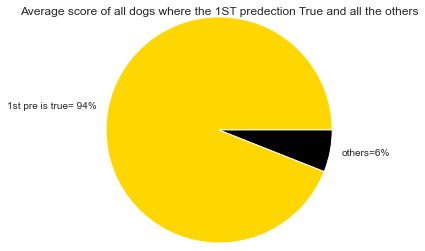

In [147]:
#pie chart between score of all the dogs where the first prediction is true  and the all of the others 
plt.pie([94,6],labels=['1st pre is true= 94%','others=6%'],colors=['gold','black'],radius=1.3)
plt.title('Average score of all dogs where the 1ST predection True and all the others');
plt.savefig('averagescore')

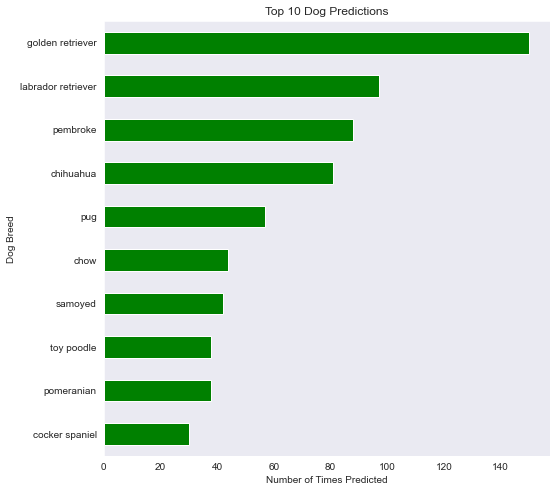

In [148]:
# bar plot for top 10 dog breeds
ii=df_master['prediction1'].value_counts()[9::-1].plot(kind='barh',color='green',figsize=(8,8))
plt.title('Top 10 Dog Predictions')
plt.xlabel('Number of Times Predicted')
plt.ylabel('Dog Breed')
plt.fontsize = 12
fig = ii.get_figure()
fig.savefig('top 10 dog.png');

### so golden retriver the first dog breed 

In [149]:
#finding correlation between variables 
df_master.corr(method ='pearson')

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,prediction1_rate,prediction1_accurate,prediction2_rate,prediction2_accurate,prediction3_rate,prediction3_accurate,rating
rating_numerator,1.000000,0.198449,0.015740,0.017218,-0.000051,-0.008761,-0.029140,-0.020194,-0.032606,-0.004522,-0.029228,0.979808
rating_denominator,0.198449,1.000000,-0.025220,-0.021308,-0.004137,-0.004293,0.001055,-0.034616,-0.000377,0.006691,0.005103,-0.001065
favorite_count,0.015740,-0.025220,1.000000,0.861342,0.125056,0.066739,0.044759,-0.017839,0.052129,-0.046693,0.036571,0.021073
retweet_count,0.017218,-0.021308,0.861342,1.000000,0.105665,0.043295,0.003271,-0.004642,0.014838,-0.031593,0.001483,0.021809
img_num,-0.000051,-0.004137,0.125056,0.105665,1.000000,0.203953,0.027483,-0.160203,0.047537,-0.139471,0.059214,0.000677
prediction1_rate,-0.008761,-0.004293,0.066739,0.043295,0.203953,1.000000,0.114830,-0.511777,0.129814,-0.709194,0.107467,-0.008219
prediction1_accurate,-0.029140,0.001055,0.044759,0.003271,0.027483,0.114830,1.000000,0.113887,0.633860,0.052115,0.555539,-0.029254
prediction2_rate,-0.020194,-0.034616,-0.017839,-0.004642,-0.160203,-0.511777,0.113887,1.000000,0.102454,0.480120,0.066749,-0.013550
prediction2_accurate,-0.032606,-0.000377,0.052129,0.014838,0.047537,0.129814,0.633860,0.102454,1.000000,0.045747,0.551359,-0.032484
prediction3_rate,-0.004522,0.006691,-0.046693,-0.031593,-0.139471,-0.709194,0.052115,0.480120,0.045747,1.000000,0.044368,-0.005542


### from above we find that correlation is postive with the higest number between 'favorite_count' and 'retweet_count', so let's plot it 

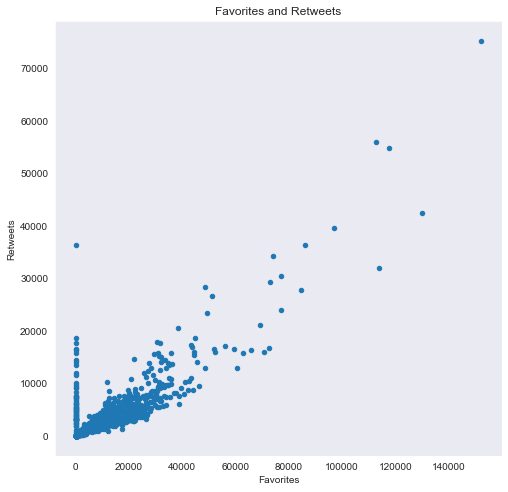

In [150]:
m=df_master.plot(x='favorite_count',y='retweet_count',kind='scatter',figsize=(8,8))
plt.title("Favorites and Retweets")
plt.xlabel('Favorites')
plt.ylabel('Retweets')
fig = m.get_figure()
fig.savefig('scatterplot2.png');

### The only other coefficient worth mentioning is the between prediction1_rate and prediction3_rate which is -0.709194, demonstrating a negative semi-strong relationship. This is probably a result because p3_conf confidence score is affected by the results of the first prediction in the neural network. The more confident the result of the first image, the less likely the following images would accurately guess the breed of dog.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


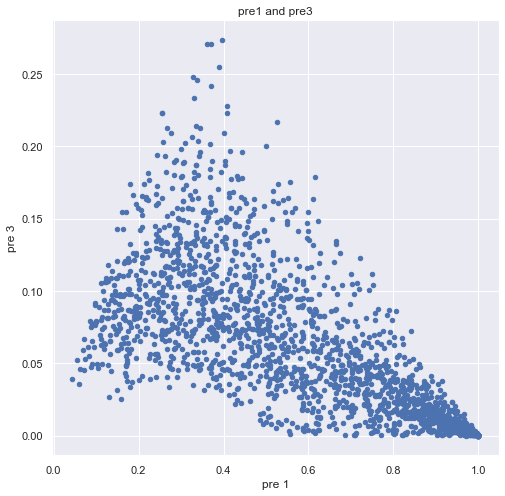

In [165]:
m=df_master.plot(x='prediction1_rate',y='prediction3_rate',kind='scatter',figsize=(8,8))
plt.title("pre1 and pre3")
plt.xlabel('pre 1')
plt.ylabel('pre 3')
fig = m.get_figure()
fig.savefig('scatterplot4.png');

#### let's check the most popular dog name 

Text(0, 0.5, 'Number of dogs')

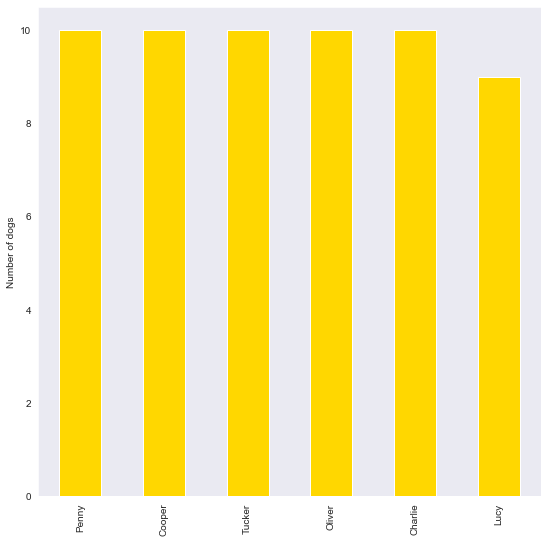

In [153]:
df_master.name.value_counts()[0:6].plot(kind='bar',figsize=(9,9),color='gold')
plt.ylabel('Number of dogs')

- it seems that the first five popualr names have the same value 

### let's check the development of this trend over time 

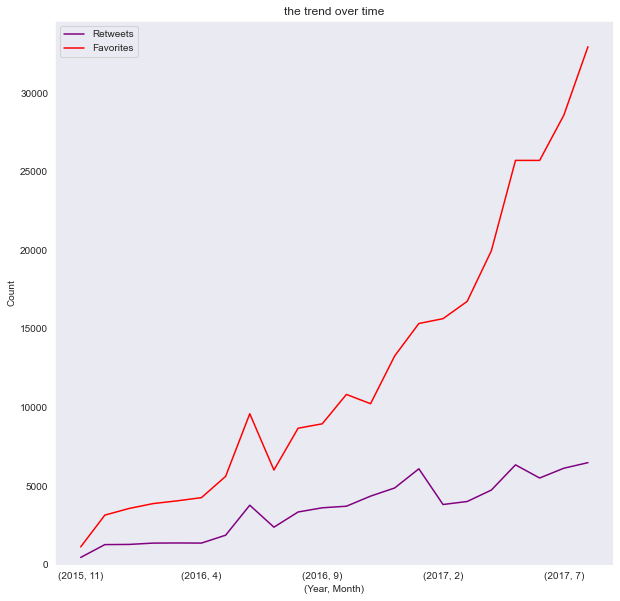

In [154]:
plt.subplots(1, sharex=True)
df_master.retweet_count.groupby([df_master["timestamp"].dt.year, df_master["timestamp"].dt.month]).mean().plot(kind='line',figsize=(10,10),color='purple')
df_master.favorite_count.groupby([df_master["timestamp"].dt.year, df_master["timestamp"].dt.month]).mean().plot(kind='line',figsize=(10,10),color='red').set_ylim(0, )
plt.title('the trend over time')
plt.ylabel('Count')
plt.xlabel('(Year, Month)')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('trend over time');

- we can notice that the favorites average skyroketted by the beginning of 2017 

## Word Cloud with Tweets¶


In [186]:
# creating a list with all the words tweeted in our data frame 
tweets = np.array(df_master.text)
cloud_list = []
for tweet in tweets:
    cloud_list.append(tweet.replace("\n",""))

In [220]:
#removing the most frequent words https and co which are in the url 
new_set = {x.replace('https', '').replace('co','').replace('t','') for x in cloud_list}


In [222]:
new_set

{'Mee Chevy. He had a lae breakfas and now has o choose beween a lae lunch or an early dinner. 11/10 very pupse ://./goy9053wC7',
 "This is Bilbo. He's no emoionally prepared o ener he waer. 11/10 don' sruggle Bilbo ://./rH9SQgZUnQ",
 'This is Mia. She makes awful decisions. 8/10 ://./G6TQVgTcZz',
 '12/10 simply brillian pup ://./V6ZzG45zzG',
 'This is an Irish Rigaoni errier named Bera. Compleely made of rope. No eyes. Quie large. Loves o dance. 10/10 ://./EM5fDykrJg',
 "This is Kevin. He's jus so happy. 13/10 wha is your secre Kevin ://./1r4MFCbCX5",
 'This is a Birmingham Quagmire named Chuk. Loves o relax and wach he game while sippin on ha iced mocha. 10/10 ://./HvNg9JWxF',
 "This is Jessiga. She's a Tasmanian McCringleberry. Selfies make her unmforable. 10/10 would pe in ime of need ://./MrdPZz1CGk",
 'Mee Sunny. He can ake down a polar bear in one fell swoop. Fr*cken deadly af. 13/10 would pe wih cauion ://./EMq8Ud6Ze1',
 'Mee Srider. He hinks he\'s a sororiy girl. Already wans 

In [223]:
# download a paw image to use ait as the cloud 
mask = np.array(Image.open(requests.get('https://clipartix.com/wp-content/uploads/2016/06/Dog-bone-pink-print-dog-paw-print-transparent-background-paw-print-pink-clipart.jpg', stream=True).raw))
text = new_set

In [217]:
from wordcloud import WordCloud, STOPWORDS 


In [224]:
def gen_wc(text, mask):
    word_cloud = WordCloud(width = 500, height = 500, background_color='white', mask=mask).generate(str(text))
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='red')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

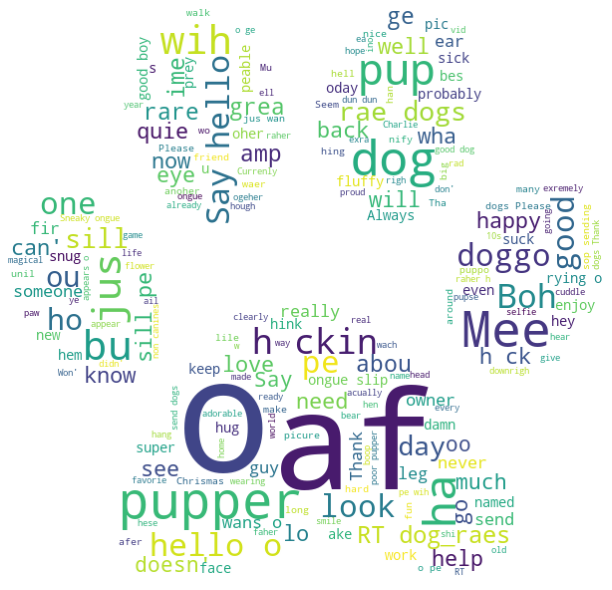

In [226]:
gen_wc(text, mask)